# Linear Regression with Scikit learn

This tutorial is for people who are just starting out with Machine Learning. Linear Regression is one of easiest concepts to understand, and we are going to use that today to predict the chances of Admission for a PG Course. As we know, admission depends on various factors like your GRE Score, SOP, CGPA, among others. The dataset i used for this notebook can be found on [kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions) or find it on my [github](https://github.com/deeksha-punachithaya/XovexIT/tree/master/LinearRegression). Let us take a minute to look at the attributes of our dataset. They are - Serial No., TOEFL Score, University Ranking, SOP, LOR, CGPA, Research, Chance of Admit. Most of these are self-explanatory. 'Chance of Admit' is the value we are trying to predict by the end of our excercise. 'Research' is a binary value which indicates whether the person did any research work or not. Since this is an easy dataset with very few rows and datasets, we can briefly tell already, the relationship between the attributes and the Chance of Admission. However, real world datasets are not so easy to understand. <br><br>
Several other similar datasets you can use for practice are the boston house price prediction, swedish auto insurance, wine quality dataset, etc which is very easy available on kaggle and other platforms. 
<br>
A little more about the dataset - most datasets we find on kaggle or [UCI](https://archive.ics.uci.edu/ml/datasets.php) are in the form of a .csv (comma separated value) file.

### Data Preprocessing

Before we actually train a model, there is a lot of work that goes into cleaning the dataset. Most often, the data has a lot of missing values, and values that deviate a lot from the other values. All this has to be dealt with before proceeding. However, we don't go into that in detail here. We also have to determine whether some attributes are unnecessary for our analysis. We'll look at this in a while. <br><br>
First, import the tools required for the project. Pandas and Numpy are two very important libraries for any data science project and is extensively used. Visit their docs for detailed information. We also import the LinearRegression model from scikit learn. We're going to use this to train our model. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Next, use the read_csv function to open the .csv file in your notebook. This is now a pandas dataframe and it looks like this. 

In [25]:
df = pd.read_csv("admission.csv")
df.head() # Display first 5 rows of the dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


info() and describe() are used to get a closer look at the dataset. info() gives us the total number of rows and columns and total number of non-null or valid values in each column. This dataset is already clean and have no null values. But real world datasets are rarely so clean. There are many ways to deal with the null values, if they exist. They are sometimes replaced with average values of the column, or manually altered according to the user's choice. And sometimes whole columns may have to be discarded if there are too many null values in it. <br>
describe() gives information like the count, minimum, maximum, mean of the values in the column. This helps gain better insight into the data.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [38]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The column 'Serial No.' is unimportant to our analysis and might even affect the model in a negative way. So drop that column as given below. If the parameter inplace is set to False, the dropping of the column wont reflect in the dataframe. 

In [26]:
df.drop(columns = ['Serial No.'], inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Data Visualization

The next task is to visualize the data. It helps understand the relationship between the target variable (the 'chance of admit' column, in this case) and the rest of the columns. We will see shortly why this is important. There are various tools available for data visualization. I've used matplotlib and seaborn. I've used a pairplot here to analyze the relationships of each column with respect to every other column. In a pairplot, we need to focus on the graphs above the diagonal, or below, and not both together since they are mirror images of each other. The diagonal itself consists of histograms which shows the distribution of each column. Observing the diagonal, we notice all the attributes have similar distribution, except the 'Research' column, and this means the columns have a high relationship between each other. We'll consider two cases while training our model, one with the 'Research' column and one without and then compare the accuracy of the two. Now lets visit our pairplot again and look the graphs on the upper triangle. We are mostly concerned about how the target variable is related to all others, so lets only look at the last column of graphs. The shape of graphs of GRE Score and TOEFL Score vs the chance of admit look similar, but some columns have categorical data (which means they are not continuous values) like University Ranking, and SOP. So these graphs look a little different. 

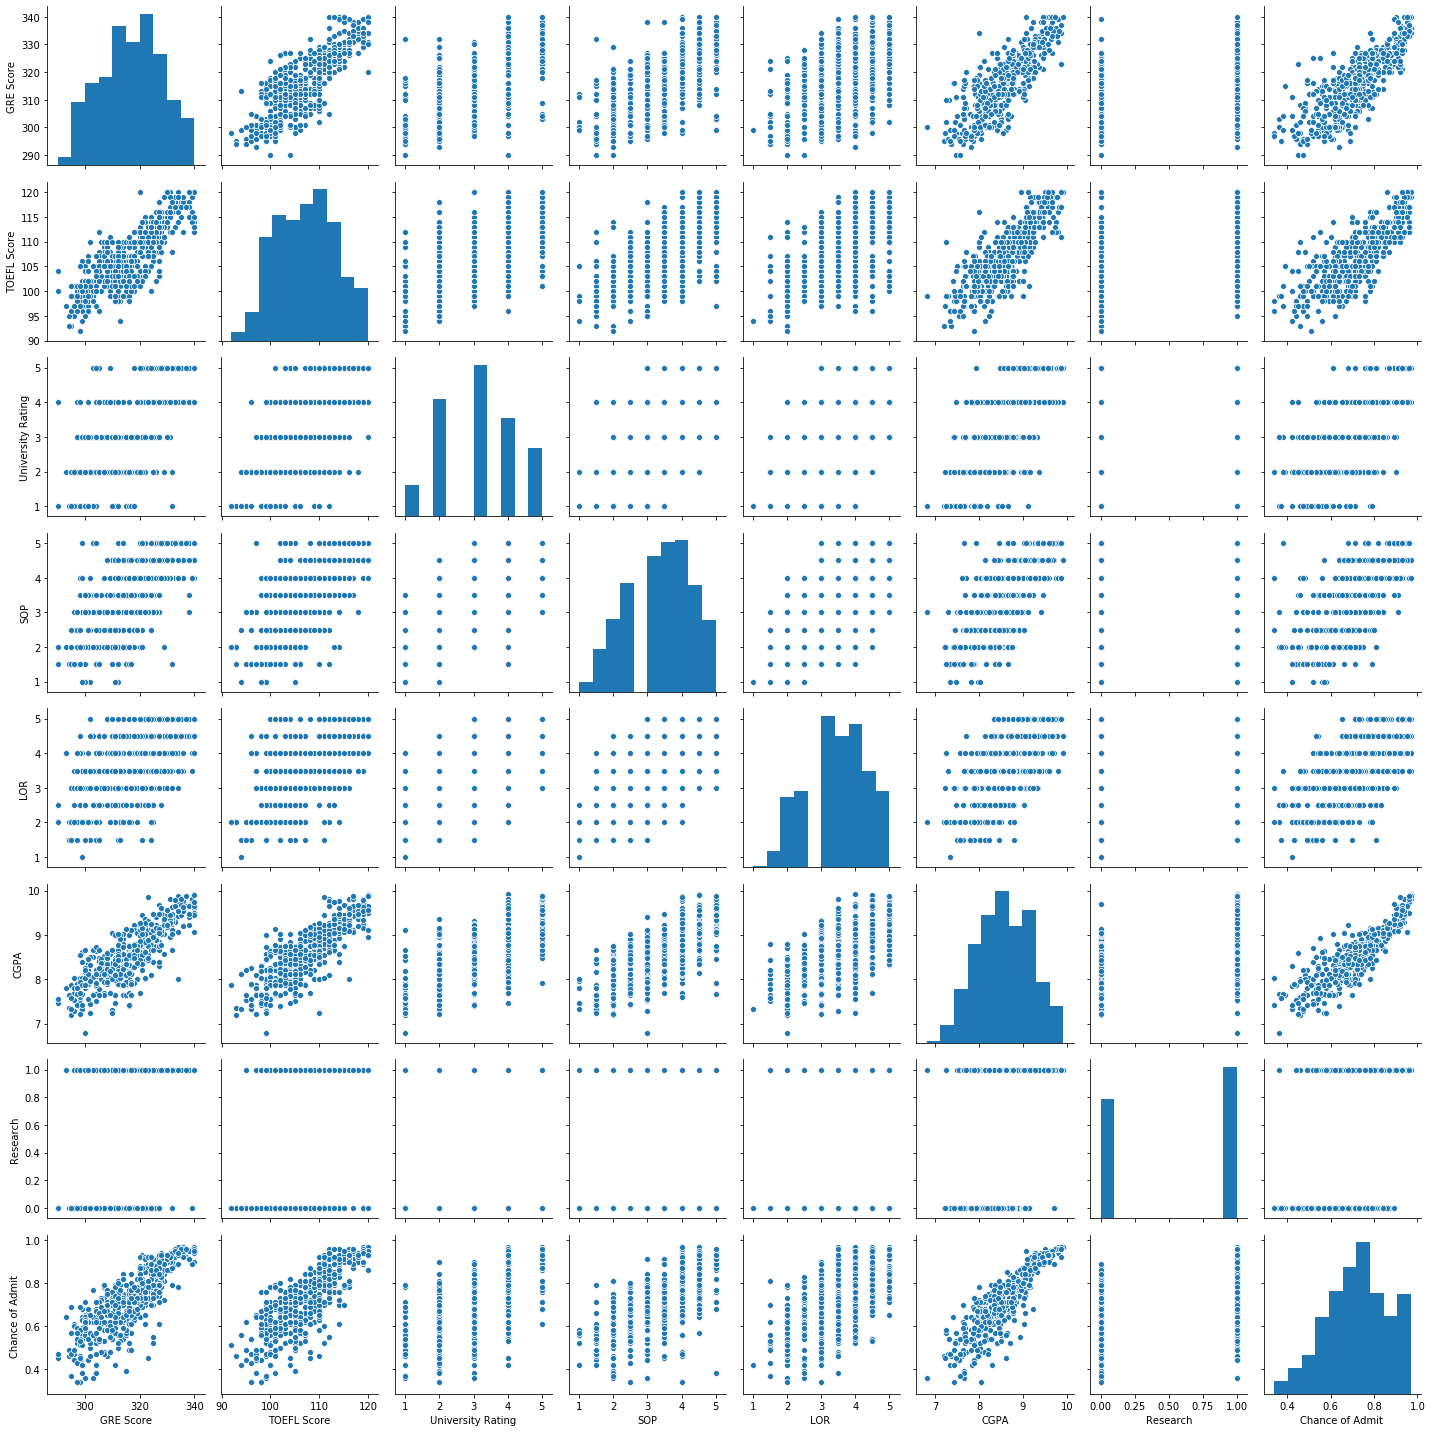

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.pairplot(df, size=2.5)
plt.tight_layout()

### Linear Regression

Linear Regression fits a linear model with coefficients w = ( w1,w2,...,wp ) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
In simple words, a linear regression model tries to minimize the error produced, and error is basically the sum of differences between the actual y value and the predicted y value. In its fit() method, Linear Regression will take in X, y and store the coefficients w in its member coef_
To understand what is a coefficient, consider the equation of a line, y = aX + b. A Linear Regression model essentially tries to find coefficient 'a' which best fits the data. I have used just one column as X here to make it simple to understand. We're trying to find a line (which is plotted in the next graph) which best fits the relation defined by GRE Score and chance of admit. 

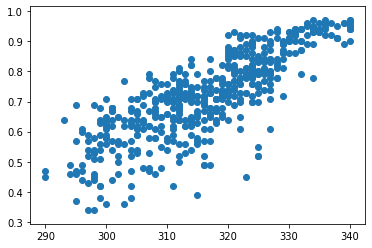

In [32]:
plt.scatter(df["GRE Score"],df["Chance of Admit "])

An ML model is trained on about 75% or 80% of the data available and then check the accuracy by predicting the values for the remaining 25% of the data. We import a function train_test_split to split the data desirably into train and test values as shown below. GRE Score is the X value and chance of Admit is y value. 

In [40]:
from sklearn.model_selection import train_test_split
X = np.array(df["GRE Score"]).reshape(-1,1)
y = df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Now we train the model on our X_train and y_train values. With this information, it finds a straight line which describes our X and y values accurately. It is going to be a straight line in this case as we are dealing with linear regression. 

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we predict the y values for our remaining test data using predict() and store it in y_pred. 

In [43]:
y_pred = lr.predict(X_test)

The most common performance metric used to measure the quality of our model and fit, in linear regression is r2_score. The r2_score function computes the coefficient of determination, usually denoted as R². It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model. Best possible score is 1.0. You can find more about this and other metrics in the scikit learn [docs](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score). It calculates the r2_score for the predicted values by comparing them with the actual y values in y_test. <br><br>
The r2_score here is 57% which means its safe to say we cannot determine if a candidate will be admitted just based on their GRE score. Later we'll consider all the X attributes and check if r2_score goes higher. 

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5759336536576442

Let's plot the line of the equation that we gained from the regression model and see how it looks. This means, any predicted value is actually going to lie on this line. To plot this, the x-axis will have the X_train values and the y-axis has the predicted y values. The green line represents this. Whereas the red dots represent the true y (y_train) values vs. X_train. We can see the difference between the true and predicted values using this plot. 

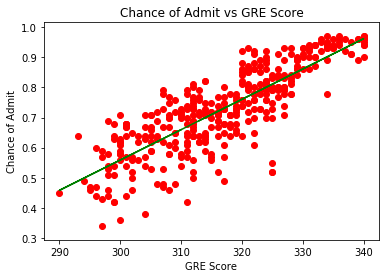

In [45]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Chance of Admit vs GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

Now lets do the same thing with our entire dataset. The X_train will have all columns except the target column, which we have dropped as shown below. And y_train will have the target variable as usual. The rest of the procedure is the same for both. 

In [46]:
X = df.drop(columns = ['Chance of Admit '])
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = lr.predict(X_test)

The r2_score is way higher now. Its almost 0.8 (80%) which is a good score for a linear regression model. 

In [49]:
r2_score(y_test, y_pred)

0.7937790343999305

Another thing i wanted to try out was to remove the Research column as it was binary data and the distribution did not look similar to others. I have carried out the same procedure as before but excluded the 'Research' column. As it turns out, I got a way better result this way. Intuitively, I thought Research was an important factor to decide Admissions, but it turns out it was reducing my accuracy. Now I have almost .85 r2_score. 

In [62]:
X = df.drop(columns = ['Chance of Admit ','Research'])
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.8461304098736568

Refer to [scikit learn](https://scikit-learn.org/stable/index.html) to learn about other ML models, and [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/index.html) for some extraordinary data visualization tools. 